In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('datasets/index2018.csv')

### checkpointing

In [3]:
data=df.copy()


data.date=pd.to_datetime(data.date,dayfirst=True)

data.head()

data.set_index(data.date,inplace=True)

del data['date']

### checkpointing for using only data for spx

In [4]:
spx_price=data.spx.copy()

## Setting the desired frequency 

In [5]:
spx_price.isna().sum()

spx_price=spx_price.asfreq('b')

As we have the missing values of price in the business days, we need to fill it with appropriate values

## Filling the missing values

In [6]:
spx_price=spx_price.fillna(method='ffill')

spx_price.isna().sum()

0

## QQ model

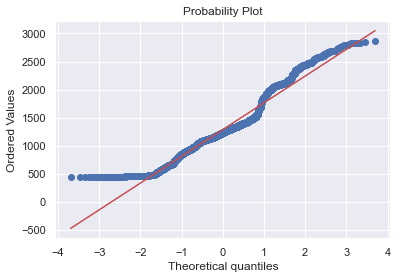

In [7]:
import scipy.stats

scipy.stats.probplot(spx_price, plot=plt)
plt.plot()
plt.show()

## Plotting the SPX price and returns

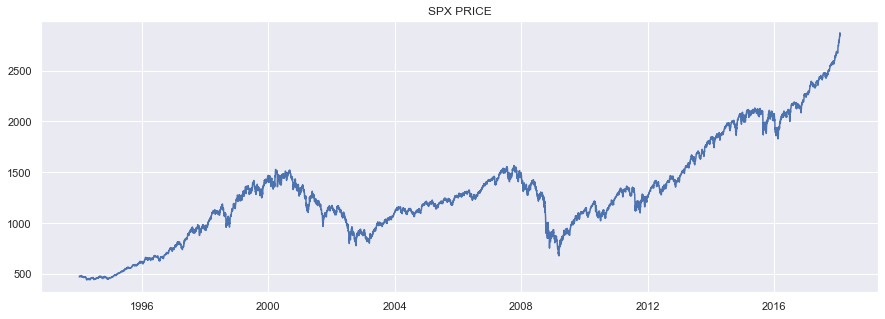

In [8]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(spx_price)
plt.title('SPX PRICE')
plt.show()

In [9]:
spx_returns=spx_price.pct_change()

spx_returns=spx_returns.dropna()

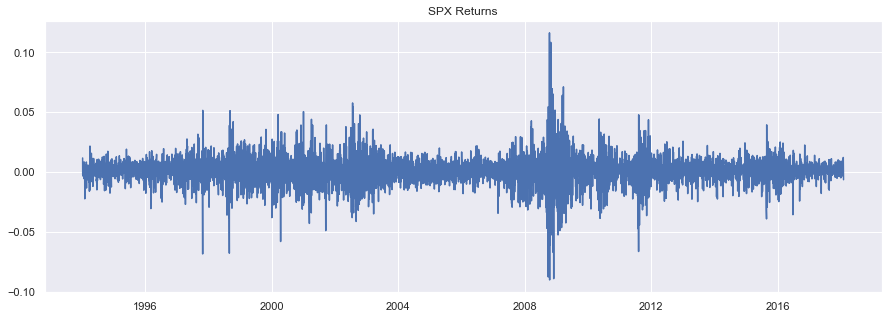

In [10]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(spx_returns)
plt.title('SPX Returns')
plt.show()

## Autocorelation

In [11]:
#importing the required package
import statsmodels.graphics.tsaplots as sgt

#### ACF AND PACF for SPX Price(non-stationary series)

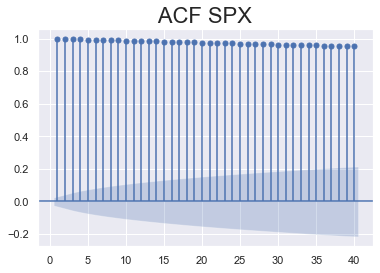

In [12]:
sgt.plot_acf(spx_price,lags=40,zero=False)
plt.title(" ACF SPX ",size=22)
plt.show()

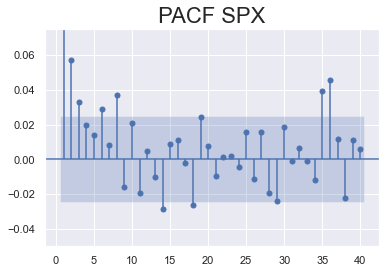

In [13]:
sgt.plot_pacf(spx_price,lags=40,zero=False,method=('ols'))
plt.title(" PACF SPX ",size=22)
plt.ylim(-0.05,0.075)
plt.show()

#### ACF and PACF for SPX returns( stationary series)

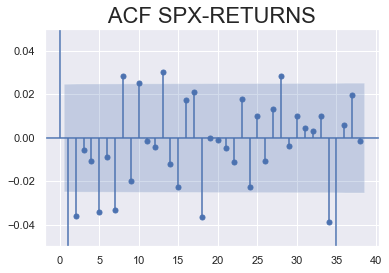

In [14]:
sgt.plot_acf(spx_returns)
plt.title(" ACF SPX-RETURNS ",size=22)
plt.ylim(-0.05,0.05)
plt.show()

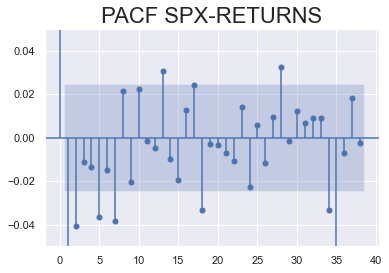

In [15]:
sgt.plot_pacf(spx_returns)
plt.title(" PACF SPX-RETURNS ",size=22)
plt.ylim(-0.05,0.05)
plt.show()

## MA MODEL(FOR PRICE)

In [16]:
#importing necessary models
from statsmodels.tsa.arima_model import ARMA

In [17]:
model_price_ma_1=ARMA(spx_price,order=(0,1))
result_price_ma_1=model_price_ma_1.fit()
result_price_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    spx   No. Observations:                 6277
Model:                     ARMA(0, 1)   Log Likelihood              -43547.796
Method:                       css-mle   S.D. of innovations            249.257
Date:                Thu, 27 May 2021   AIC                          87101.592
Time:                        11:34:49   BIC                          87121.826
Sample:                    01-07-1994   HQIC                         87108.603
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.7036      6.226    206.994      0.000    1276.501    1300.906
ma.L1.spx      0.9791      0.002    532.450      0.000       0.975       0.983
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0214           +0.0000j            1.0214            0.5000
-----------------------------------------------------------------------------
"""

In [18]:
model_price_ma_2=ARMA(spx_price,order=(0,2))
result_price_ma_2=model_price_ma_2.fit()
result_price_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    spx   No. Observations:                 6277
Model:                     ARMA(0, 2)   Log Likelihood              -39896.385
Method:                       css-mle   S.D. of innovations            139.293
Date:                Thu, 27 May 2021   AIC                          79800.771
Time:                        11:34:50   BIC                          79827.749
Sample:                    01-07-1994   HQIC                         79810.118
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.7270      6.482    198.825      0.000    1276.023    1301.431
ma.L1.spx      1.7744      0.005    337.241      0.000       1.764       1.785
ma.L2.spx      0.9129      0.004    239.092      0.000       0.905       0.920
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.9718           -0.3885j            1.0466           -0.4395
MA.2           -0.9718           +0.3885j            1.0466            0.4395
-----------------------------------------------------------------------------
"""

In [19]:
model_price_ma_3=ARMA(spx_price,order=(0,3))
result_price_ma_3=model_price_ma_3.fit()
result_price_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    spx   No. Observations:                 6277
Model:                     ARMA(0, 3)   Log Likelihood              -37196.344
Method:                       css-mle   S.D. of innovations             90.592
Date:                Thu, 27 May 2021   AIC                          74402.689
Time:                        11:34:52   BIC                          74436.412
Sample:                    01-07-1994   HQIC                         74414.373
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.8031      6.849    188.171      0.000    1275.379    1302.227
ma.L1.spx      2.1611      0.010    223.264      0.000       2.142       2.180
ma.L2.spx      2.0263      0.010    206.817      0.000       2.007       2.045
ma.L3.spx      0.8040      0.007    123.627      0.000       0.791       0.817
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.1072           -0.0000j            1.1072           -0.5000
MA.2           -0.7065           -0.7901j            1.0599           -0.3661
MA.3           -0.7065           +0.7901j            1.0599            0.3661
-----------------------------------------------------------------------------
"""

In [20]:
model_price_ma_4=ARMA(spx_price,order=(0,4))
result_price_ma_4=model_price_ma_4.fit()
result_price_ma_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    spx   No. Observations:                 6277
Model:                     ARMA(0, 4)   Log Likelihood              -35035.487
Method:                       css-mle   S.D. of innovations             64.201
Date:                Thu, 27 May 2021   AIC                          70082.974
Time:                        11:34:53   BIC                          70123.441
Sample:                    01-07-1994   HQIC                         70096.995
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1288.7824      7.358    175.161      0.000    1274.362    1303.203
ma.L1.spx      2.3856      0.011    225.268      0.000       2.365       2.406
ma.L2.spx      2.9211      0.017    166.993      0.000       2.887       2.955
ma.L3.spx      2.0601      0.014    148.706      0.000       2.033       2.087
ma.L4.spx      0.7157      0.007    105.560      0.000       0.702       0.729
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.4208           -0.9720j            1.0591           -0.3150
MA.2           -0.4208           +0.9720j            1.0591            0.3150
MA.3           -1.0185           -0.4563j            1.1161           -0.4330
MA.4           -1.0185           +0.4563j            1.1161            0.4330
-----------------------------------------------------------------------------
"""

In [21]:
model_price_ma_12=ARMA(spx_price,order=(0,12))
result_price_ma_12=model_price_ma_12.fit()
result_price_ma_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    spx   No. Observations:                 6277
Model:                    ARMA(0, 12)   Log Likelihood              -28820.655
Method:                       css-mle   S.D. of innovations             23.851
Date:                Thu, 27 May 2021   AIC                          57669.311
Time:                        11:35:53   BIC                          57763.736
Sample:                    01-07-1994   HQIC                         57702.027
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1289.1028     11.147    115.646      0.000    1267.255    1310.950
ma.L1.spx      1.8904      0.015    129.763      0.000       1.862       1.919
ma.L2.spx      2.8978      0.033     88.311      0.000       2.834       2.962
ma.L3.spx      3.8455      0.054     71.713      0.000       3.740       3.951
ma.L4.spx      4.5754      0.071     64.887      0.000       4.437       4.714
ma.L5.spx      4.9260      0.080     61.926      0.000       4.770       5.082
ma.L6.spx      4.8495      0.079     61.680      0.000       4.695       5.004
ma.L7.spx      4.3220      0.069     62.737      0.000       4.187       4.457
ma.L8.spx      3.5152      0.054     64.599      0.000       3.409       3.622
ma.L9.spx      2.5348      0.040     62.795      0.000       2.456       2.614
ma.L10.spx     1.6058      0.030     53.110      0.000       1.547       1.665
ma.L11.spx     0.8171      0.022     37.161      0.000       0.774       0.860
ma.L12.spx     0.2804      0.013     22.119      0.000       0.256       0.305
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
MA.1             0.6980           -0.7651j            1.0357           -0.1323
MA.2             0.6980           +0.7651j            1.0357            0.1323
MA.3             0.4126           -1.0016j            1.0832           -0.1878
MA.4             0.4126           +1.0016j            1.0832            0.1878
MA.5            -0.0372           -1.1131j            1.1137           -0.2553
MA.6            -0.0372           +1.1131j            1.1137            0.2553
MA.7            -0.5090           -1.0165j            1.1368           -0.3239
MA.8            -0.5090           +1.0165j            1.1368            0.3239
MA.9            -1.1051           -0.2844j            1.1411           -0.4599
MA.10           -1.1051           +0.2844j            1.1411            0.4599
MA.11           -0.9164           -0.7196j            1.1651           -0.3940
MA.12           -0.9164           +0.7196j            1.1651            0.3940
------------------------------------------------------------------------------
"""

## LLR Test

In [22]:
from scipy.stats.distributions import chi2
def LLR_test(mod_1,mod_2,DF=1):
    #Here, DF is the Degree of freedom, the degree of freedom between AR(1) and AR(2) is 1.
    
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR,DF).round(3)
    return p

In [23]:
model_price_ma_13=ARMA(spx_price,order=(0,13))
result_price_ma_13=model_price_ma_13.fit()
print(result_price_ma_13.summary())
print("\n LLR test p-value="+str(LLR_test(model_price_ma_12,model_price_ma_13)))

                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6277
Model:                    ARMA(0, 13)   Log Likelihood              -28518.038
Method:                       css-mle   S.D. of innovations             22.728
Date:                Thu, 27 May 2021   AIC                          57066.076
Time:                        11:37:12   BIC                          57167.246
Sample:                    01-07-1994   HQIC                         57101.130
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1289.2337     11.188    115.229      0.000    1267.305    1311.163
ma.L1.spx      1.7817      0.014    130.830      0.000       1.755       1.808
ma.L2.spx      2.6422      0.027     97.148      0.0

In [24]:
model_price_ma_14=ARMA(spx_price,order=(0,14))
result_price_ma_14=model_price_ma_14.fit()
print(result_price_ma_14.summary())
print("\n LLR test p-value="+str(LLR_test(model_price_ma_13,model_price_ma_14)))

                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6277
Model:                    ARMA(0, 14)   Log Likelihood              -28226.596
Method:                       css-mle   S.D. of innovations             21.697
Date:                Thu, 27 May 2021   AIC                          56485.192
Time:                        11:40:15   BIC                          56593.107
Sample:                    01-07-1994   HQIC                         56522.582
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1289.3155     11.964    107.762      0.000    1265.866    1312.765
ma.L1.spx      1.7444      0.013    132.572      0.000       1.719       1.770
ma.L2.spx      2.6031      0.026     99.329      0.0

### MA MODEL(FOR RETURNS)

In [25]:
model_return_ma_1=ARMA(spx_returns,order=(0,1))
result_return_ma_1=model_return_ma_1.fit()
print(result_return_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(0, 1)   Log Likelihood               19236.052
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 27 May 2021   AIC                         -38466.104
Time:                        11:42:48   BIC                         -38445.871
Sample:                    01-10-1994   HQIC                        -38459.094
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.660      0.008    9.25e-05       0.001
ma.L1.spx     -0.0727      0.013     -5.553      0.000      -0.098      -0.047
                                    Roots           

In [26]:
model_return_ma_2=ARMA(spx_returns,order=(0,2))
result_return_ma_2=model_return_ma_2.fit()
print(result_return_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(0, 2)   Log Likelihood               19240.615
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 27 May 2021   AIC                         -38473.229
Time:                        11:42:48   BIC                         -38446.251
Sample:                    01-10-1994   HQIC                        -38463.882
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.772      0.006       0.000       0.001
ma.L1.spx     -0.0708      0.013     -5.613      0.000      -0.096      -0.046
ma.L2.spx     -0.0389      0.013     -3.024      0.0

In [27]:
model_return_ma_3=ARMA(spx_returns,order=(0,3))
result_return_ma_3=model_return_ma_3.fit()
print(result_return_ma_3.summary())

                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(0, 3)   Log Likelihood               19241.002
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 27 May 2021   AIC                         -38472.004
Time:                        11:42:48   BIC                         -38438.281
Sample:                    01-10-1994   HQIC                        -38460.319
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.808      0.005       0.000       0.001
ma.L1.spx     -0.0708      0.013     -5.606      0.000      -0.096      -0.046
ma.L2.spx     -0.0390      0.013     -3.027      0.0

In [28]:
model_return_ma_4=ARMA(spx_returns,order=(0,4))
result_return_ma_4=model_return_ma_4.fit()
print(result_return_ma_4.summary())

                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(0, 4)   Log Likelihood               19241.904
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 27 May 2021   AIC                         -38471.808
Time:                        11:42:49   BIC                         -38431.341
Sample:                    01-10-1994   HQIC                        -38457.787
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.863      0.004       0.000       0.001
ma.L1.spx     -0.0719      0.013     -5.679      0.000      -0.097      -0.047
ma.L2.spx     -0.0387      0.013     -3.057      0.0

In [29]:
model_return_ma_9=ARMA(spx_returns,order=(0,8))
result_return_ma_9=model_return_ma_9.fit()
print(result_return_ma_9.summary())

                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                     ARMA(0, 8)   Log Likelihood               19251.985
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 27 May 2021   AIC                         -38483.971
Time:                        11:42:51   BIC                         -38416.526
Sample:                    01-10-1994   HQIC                        -38460.603
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      3.014      0.003       0.000       0.001
ma.L1.spx     -0.0701      0.013     -5.554      0.000      -0.095      -0.045
ma.L2.spx     -0.0414      0.013     -3.269      0.0

In [30]:
model_return_ma_12=ARMA(spx_returns,order=(0,12))
result_return_ma_12=model_return_ma_12.fit()
print(result_return_ma_12.summary())

                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                    ARMA(0, 12)   Log Likelihood               19255.230
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 27 May 2021   AIC                         -38482.460
Time:                        11:43:00   BIC                         -38388.037
Sample:                    01-10-1994   HQIC                        -38449.744
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.989      0.003       0.000       0.001
ma.L1.spx     -0.0700      0.013     -5.541      0.000      -0.095      -0.045
ma.L2.spx     -0.0402      0.013     -3.166      0.0

In [31]:
model_return_ma_13=ARMA(spx_returns,order=(0,13))
result_return_ma_13=model_return_ma_13.fit()
print(result_return_ma_13.summary())
print("\n LLR test p-value="+str(LLR_test(model_return_ma_12,model_return_ma_13)))

                              ARMA Model Results                              
Dep. Variable:                    spx   No. Observations:                 6276
Model:                    ARMA(0, 13)   Log Likelihood               19257.033
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 27 May 2021   AIC                         -38484.066
Time:                        11:43:17   BIC                         -38382.899
Sample:                    01-10-1994   HQIC                        -38449.014
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.915      0.004       0.000       0.001
ma.L1.spx     -0.0694      0.013     -5.500      0.000      -0.094      -0.045
ma.L2.spx     -0.0391      0.013     -3.084      0.0

In my view , MA(13) model will perform well, as the has the highest LOG LIKELIHOOD and , lower information criteria(AIC,BIC). so we will take this model to perdict our stock returns.

## Analysing the Residuals

In [32]:
residuals=result_return_ma_13.resid

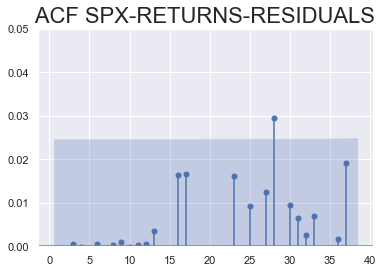

In [33]:
sgt.plot_acf(residuals,zero=False)
plt.title(" ACF SPX-RETURNS-RESIDUALS ",size=22)
plt.ylim(0,0.05)
plt.show()

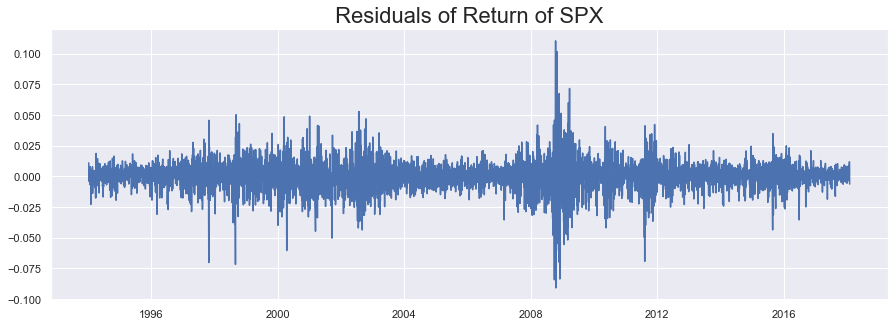

In [34]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(residuals)
plt.title(" Residuals of Return of SPX ",size=22)
plt.show()